In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

* **Response (target)** - 1 if customer accepted the offer in the last campaign, 0 otherwise
ID - Unique ID of each customer
* **Year_Birth** - Age of the customer
Complain - 1 if the customer complained in the last 2 years
* **Dt_Customer** - date of customer's enrollment with the company
* **Education** - customer's level of education
* **Marital** - customer's marital status
* **Kidhome** - number of small children in customer's household
* **Teenhome** - number of teenagers in customer's household
* **Income** - customer's yearly household income
* **MntFishProducts** - the amount spent on fish products in the last 2 years
* **MntMeatProducts** -  the amount spent on meat products in the last 2 years
* **MntFruits** - the amount spent on fruits products in the last 2 years
* **MntSweetProducts** - amount spent on sweet products in the last 2 years
* **MntWines** - the amount spent on wine products in the last 2 years
* **MntGoldProds** - the amount spent on gold products in the last 2 years
* **NumDealsPurchases** - number of purchases made with discount
* **NumCatalogPurchases** -  number of purchases made using catalog (buying goods to be shipped through the mail)
* **NumStorePurchases** - number of purchases made directly in stores
* **NumWebPurchases** - number of purchases made through the company's website
NumWebVisitsMonth - number of visits to company's website in the last month
Recency - number of days since the last purchase




In [76]:
csv_filepath = '/content/drive/MyDrive/MLOps/superstore_data.csv'
supermarket_data = pd.read_csv(csv_filepath, parse_dates = True)
supermarket_data.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


## Feature Engineering

In [77]:
supermarket_data['Age'] = 2022 - supermarket_data['Year_Birth']
get_customer_year = lambda x: int(x.split('/')[-1])
supermarket_data['Enrollment'] = 2022 - supermarket_data['Dt_Customer'].apply(get_customer_year)

In [78]:
supermarket_data.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Enrollment
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,218,1,4,4,6,1,1,0,52,8
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,37,1,7,3,7,5,1,0,61,8
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,30,1,3,2,5,2,0,0,64,8
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,1,1,0,2,7,0,0,55,8
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,34,2,3,1,2,7,1,0,33,8


## EDA

Campaign Offers Acceptance: 14.91%


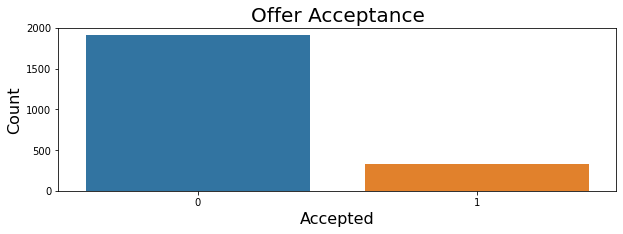

In [79]:
fig, ax = plt.subplots(figsize=(10,3))
acceptance_percent = (supermarket_data['Response'].mean()*100)
print(f'Campaign Offers Acceptance: {acceptance_percent:.2f}%')
ax = sns.countplot(data=supermarket_data, x='Response' ,ax=ax)
plt.title("Offer Acceptance", fontsize=20)
plt.xlabel("Accepted", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.show()

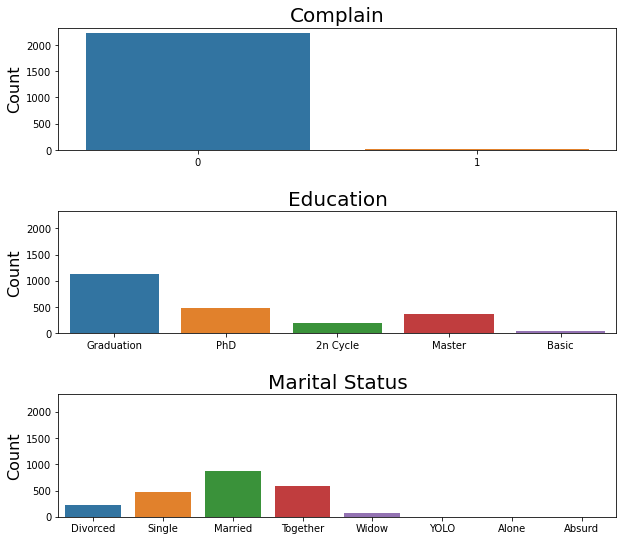

In [80]:
categorical_cols = ['Complain', 'Education', 'Marital_Status']
fig, ax = plt.subplots(len(categorical_cols), figsize=(10,3*len(categorical_cols)), sharey=True)
fig.subplots_adjust(hspace=0.5)
idx = 0
for col in categorical_cols:
  g = sns.countplot(data=supermarket_data, x=col,ax=ax[idx])
  ax[idx].set_title(col.replace('_', ' '), fontsize=20)
  ax[idx].set_ylabel("Count", fontsize=16)
  ax[idx].set_xlabel('')
  idx += 1

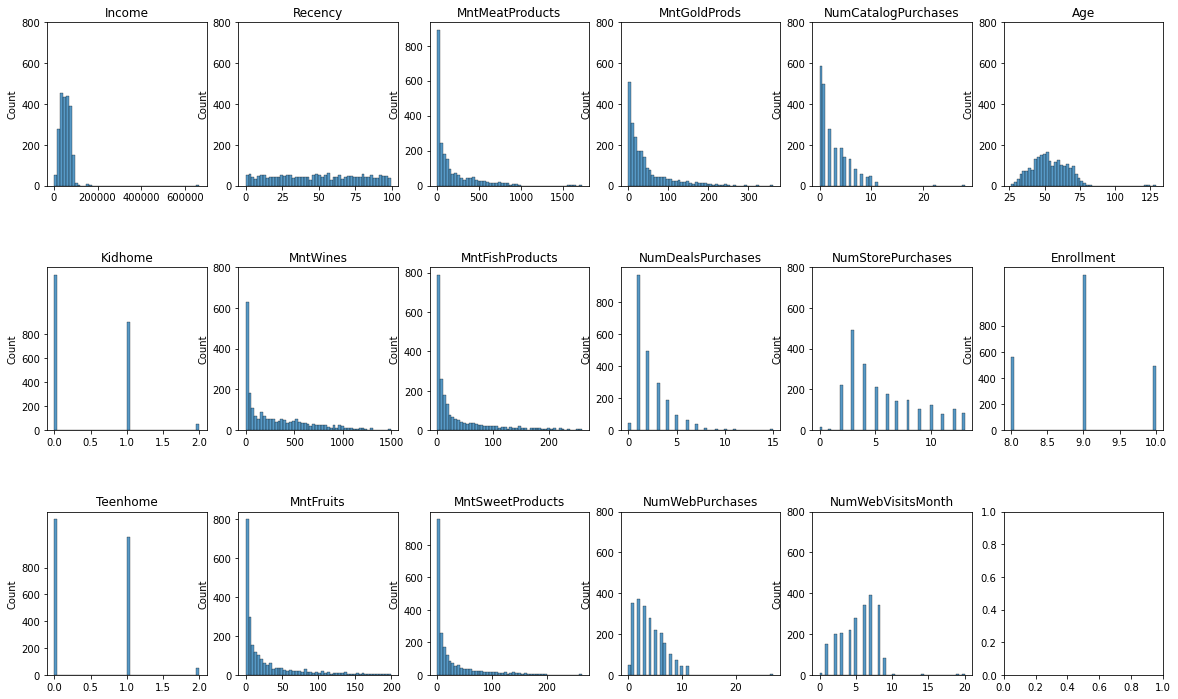

In [86]:
continuous_cols = ['Income', 'Kidhome', 'Teenhome', 'Recency',
                   'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                   'MntSweetProducts','MntGoldProds', 'NumDealsPurchases', 
                   'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 
                   'NumWebVisitsMonth','Age', 'Enrollment']
fig, ax = plt.subplots(3,6, figsize=(20,12))
fig.subplots_adjust(hspace=0.5)
idx = 0
for col in range(6):
  for row in range(3):
    if idx < len(continuous_cols):
      colname = continuous_cols[idx]
      g = sns.histplot(data=supermarket_data, x=colname, stat='count', bins=50, ax=ax[row, col])
      ax[row, col].set_title(colname.replace('_', ' '), fontsize=12)
      ax[row, col].set_ylabel("Count", fontsize=10)
      ax[row, col].set_xlabel('')
      ax[row, col].set_yticks(range(0,1000, 200))
      idx += 1

## Cleaning

In [102]:
predictors = continuous_cols + categorical_cols
df = supermarket_data[predictors + ['Response']]
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Enrollment,Complain,Education,Marital_Status,Response
0,84835.0,0,0,0,189,104,379,111,189,218,...,4,4,6,1,52,8,0,Graduation,Divorced,1
1,57091.0,0,0,0,464,5,64,7,0,37,...,7,3,7,5,61,8,0,Graduation,Single,1
2,67267.0,0,1,0,134,11,59,15,2,30,...,3,2,5,2,64,8,0,Graduation,Married,0
3,32474.0,1,1,0,10,0,1,0,0,0,...,1,0,2,7,55,8,0,Graduation,Together,0
4,21474.0,1,0,0,6,16,24,11,0,34,...,3,1,2,7,33,8,0,Graduation,Single,1


In [103]:
df['Income'] = df['Income'].fillna(df['Income'].median())
fixed_marital_status = ['Divorced', 'Single', 'Married', 'Together', 'Widow', 'Others']
clean_marital_status = lambda x: x if x in fixed_marital_status else 'Others'
df['Marital_Status'] = df['Marital_Status'].apply(clean_marital_status)

## Encoding

In [109]:
X = df[predictors]
y = df.Response

In [110]:
marital_encoder = preprocessing.LabelEncoder()
marital_labels = X['Marital_Status'].unique()
marital_encoder.fit(marital_labels)
X['Marital_Status'] = marital_encoder.transform(X['Marital_Status'])

In [111]:
education_encoder = preprocessing.LabelEncoder()
education_labels = X['Education'].unique()
education_encoder.fit(education_labels)
X['Education'] = education_encoder.transform(X['Education'])

In [112]:
X.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Enrollment,Complain,Education,Marital_Status
0,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,52,8,0,2,0
1,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,61,8,0,2,3
2,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,64,8,0,2,1
3,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,55,8,0,2,4
4,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,33,8,0,2,3


## Splitting

In [114]:
# Split sizes
train_size = 0.7
val_size = 0.15
test_size = 0.15

In [117]:
# Split (train, test)
X_train, X_, y_train, y_ = train_test_split(X, y, train_size=train_size, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, train_size=0.5, stratify=y_)

In [118]:
print(f"train: {len(X_train)} ({len(X_train)/len(X):.2f})\n"
      f"val: {len(X_val)} ({len(X_val)/len(X):.2f})\n"
      f"test: {len(X_test)} ({len(X_test)/len(X):.2f})")

train: 1568 (0.70)
val: 336 (0.15)
test: 336 (0.15)


In [130]:
# Get counts for each class
counts = {}
counts["train_counts"] = y_train.value_counts().apply(lambda x: x/len(y_train)).to_dict()
counts["val_counts"] = y_val.value_counts().apply(lambda x: x/len(y_val)).to_dict()
counts["test_counts"] = y_test.value_counts().apply(lambda x: x/len(y_val)).to_dict()

In [131]:
# View distributions
data_response_dist = pd.DataFrame(counts).T.fillna(0).apply(lambda x: round(x*100,2))
data_response_dist.columns= ['Rejected %', 'Accepted %']
data_response_dist

,Rejected %,Accepted %
train_counts,85.08,14.92
val_counts,85.12,14.88
test_counts,85.12,14.88
